In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [66]:
df_housing = pd.read_csv(r"C:\Users\abdulsamet.onay\Desktop\eğitim\lmsdatascience\clustering.csv")

In [67]:
df_housing

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10
...,...,...,...,...,...,...,...,...
487,1,5.0,2.5,1800000,1890,3073,586,76
488,1,2.0,1.0,695000,1923,1045,665,106
489,1,3.0,2.0,1650000,1922,1483,1113,106
490,1,1.0,1.0,649000,1983,850,764,163


In [68]:
x_train, x_test, y_train, y_test =train_test_split(df_housing.iloc[:, 1:],df_housing.iloc[:, 0],test_size=0.2, random_state=42)

In [69]:
train_df=x_train.copy()
train_df["in_sf"]=y_train

In [70]:
train_df["location"]= train_df["in_sf"].apply(lambda x: (x and 'SF') or 'NY')
train_df.head()

,beds,bath,price,year_built,sqft,price_per_sqft,elevation,in_sf,location
377,3.0,2.0,2395000,1929,2323,1031,73,1,SF
124,0.0,1.0,349000,1960,400,873,13,0,NY
419,4.0,3.0,3420000,1926,5113,669,98,1,SF
417,6.0,3.5,995000,2001,3080,323,55,1,SF
172,2.0,2.0,1599000,1973,1400,1142,10,0,NY


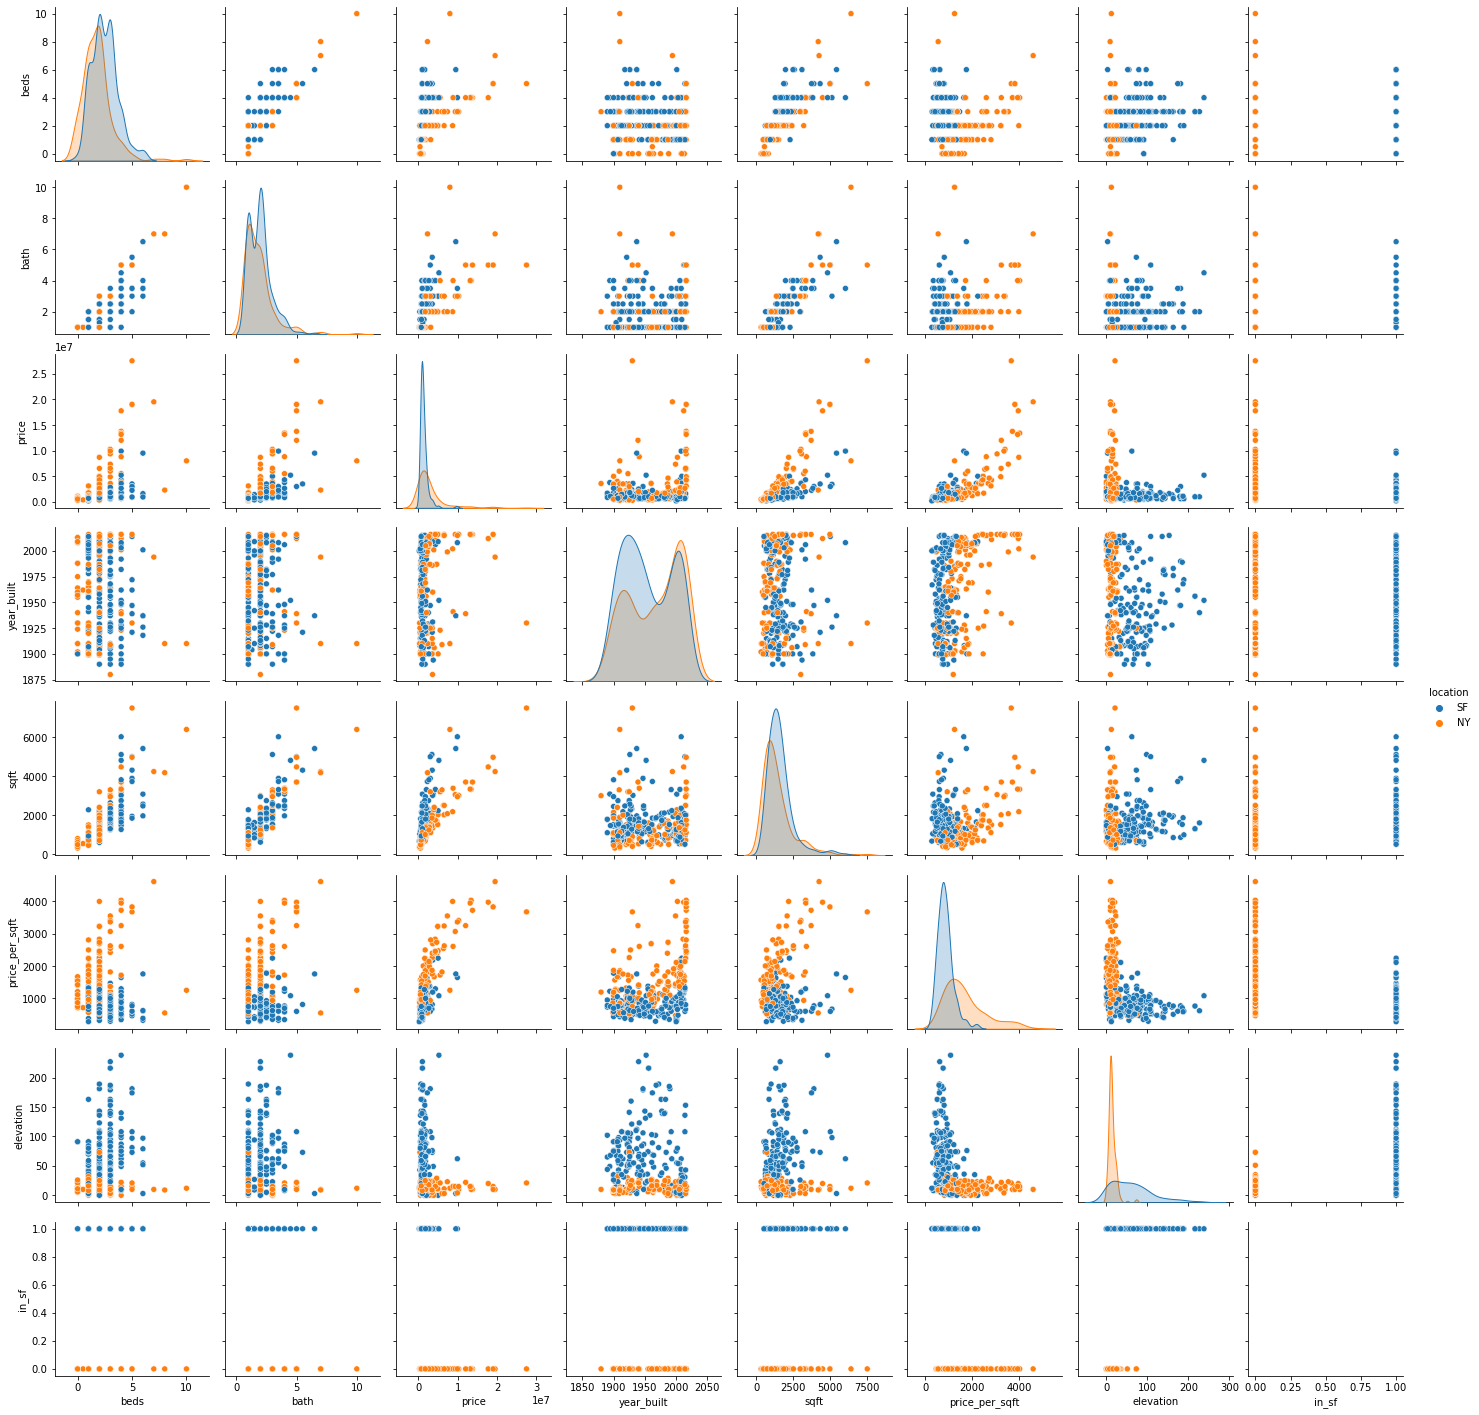

In [71]:
sns.pairplot(train_df, hue="location");

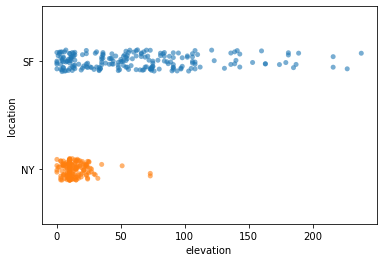

In [72]:
sns.stripplot(x="elevation", y="location", data=train_df, alpha=0.6);

In [78]:
lml=LogisticRegression(solver="liblinear")
lml.fit(x_train[["elevation"]].values, y_train)

LogisticRegression(solver='liblinear')

In [79]:
print("training accuracy:", round(lml.score(x_train[["elevation"]].values, y_train), 3))
print("test score:", round(lml.score(x_test[["elevation"]].values, y_test),3))

training accuracy: 0.796
test score: 0.808


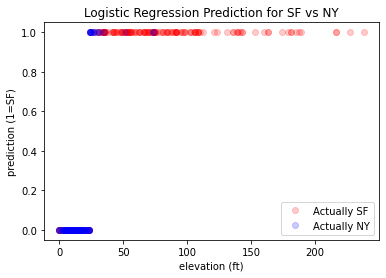

In [80]:
feature= train_df[["elevation"]].values
prediction_train = lml.predict(feature)

sf_mask = (train_df["location"]=="SF")

plt.plot(feature[sf_mask], prediction_train[sf_mask], "ro", label="Actually SF", alpha=0.2)
plt.plot(feature[~sf_mask], prediction_train[~sf_mask], "bo", label="Actually NY", alpha=0.2)
plt.xlabel("elevation (ft)")
plt.ylabel("prediction (1=SF)")
plt.title("Logistic Regression Prediction for SF vs NY")
plt.legend(loc="lower right");

In [81]:
lml.predict([[25]])

array([1], dtype=int64)

In [82]:
lml.predict([[72],[8],[23],[99]])

array([1, 0, 0, 1], dtype=int64)

In [83]:
lml.predict([[21],[24],[27],[30]])

array([0, 1, 1, 1], dtype=int64)

In [85]:
lml.predict_proba([[6],[22],[50],[80]])

array([[0.76400761, 0.23599239],
       [0.53117778, 0.46882222],
       [0.15284483, 0.84715517],
       [0.02457766, 0.97542234]])

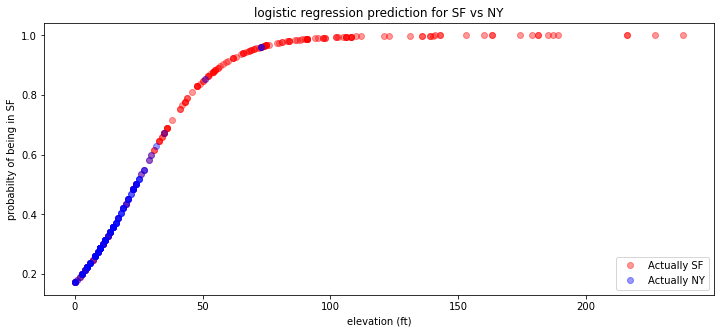

In [76]:
prediction_soft= lml.predict_proba(feature)[:,1]
plt.figure(figsize=[12,5])
plt.plot(feature[sf_mask], prediction_soft[sf_mask], "ro", label="Actually SF", alpha=0.4)
plt.plot(feature[~sf_mask], prediction_soft[~sf_mask], "bo", label="Actually NY", alpha=0.4)
plt.xlabel("elevation (ft)")
plt.ylabel("probabilty of being in SF")
plt.title("logistic regression prediction for SF vs NY")
plt.legend(loc="lower right");


In [88]:
print(lml.coef_, lml.intercept_)
print("cut off value:", abs(lml.intercept_ / lml.coef_))

[[0.06561906]] [-1.56849255]
cut off value: [[23.90300112]]


In [89]:
lml.predict_proba([[23.90300112]])

array([[0.5, 0.5]])

In [90]:
lml.predict([[23.9]])

array([0], dtype=int64)

In [91]:
prediction_test=lml.predict(x_test[["elevation"]].values)

In [92]:
confusion_matrix(y_train, prediction_train)

array([[163,  18],
       [ 62, 150]], dtype=int64)

In [22]:
confusion_matrix(y_test, prediction_test)

array([[37,  6],
       [13, 43]], dtype=int64)

In [23]:
std_scale = StandardScaler()

x_train= train_df[["elevation", "price_per_sqft"]]
x_train_scaled=std_scale.fit_transform(x_train)

x_test =x_test[["elevation", "price_per_sqft"]]
x_test_scaled=std_scale.fit_transform(x_test)

lm2= LogisticRegression(solver="liblinear")
lm2.fit(x_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [24]:
print("training accuracy:", round(lm2.score(x_train_scaled, y_train), 3))
print("test score:", round(lm2.score(x_test_scaled, y_test),3))

training accuracy: 0.819
test score: 0.838


In [25]:
y_predict=lm2.predict(x_test_scaled)
y_predict

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [26]:
y_predict_test=lm2.predict(x_test_scaled)
lm2.score(x_test_scaled, y_test)

0.8383838383838383

In [27]:
confusion_matrix(y_test, y_predict_test)

array([[38,  5],
       [11, 45]], dtype=int64)

In [28]:
confusion_matrix(y_test, prediction_test)

array([[37,  6],
       [13, 43]], dtype=int64)

In [29]:
lml=LogisticRegression(solver="liblinear")
lml.fit(x_train[["elevation"]].values, y_train)

LogisticRegression(solver='liblinear')

In [30]:
print("training accuracy:", round(lml.score(x_train[["elevation"]].values, y_train), 3))
print("test score:", round(lml.score(x_test[["elevation"]].values, y_test),3))

training accuracy: 0.796
test score: 0.808


# KNN

In [32]:
from sklearn.datasets import load_iris
iris= load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
df=pd.read_csv(r"C:\\Users\\abdulsamet.onay\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv")
df

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
x=iris.data
y=iris.target

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

# KNN (K=5)

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)
y_pred = knn.predict(x)

print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


# KNN (K=1)

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)
y_pred = knn.predict(x)

print(metrics.accuracy_score(y, y_pred))

1.0


# train & test ayrım yapuılarak

In [47]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [51]:
print(x_train.shape)
print(y_train.shape)

(105, 4)
(105,)


In [52]:
print(x_test.shape)
print(y_test.shape)

(45, 4)
(45,)


In [53]:
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_train)

print(metrics.accuracy_score(y_train, y_pred))

0.9523809523809523


In [54]:
knn =KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_train)

print(metrics.accuracy_score(y_train, y_pred))

1.0


# cross validation 

In [55]:
from sklearn.model_selection import cross_val_score

In [57]:
knn =KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=10, scoring="accuracy")
print(scores)
print(scores.mean())
print(scores.max())
print(scores.min())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668
1.0
0.8666666666666667


# how to determine perfect fit "n_neighbors" number

In [64]:
k_range = list(range(1,30))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334]


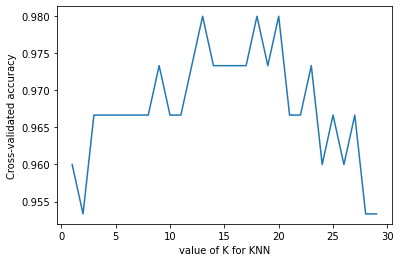

In [96]:
import matplotlib.pyplot as plt
plt.plot (k_range, k_scores)
plt.xlabel("value of K for KNN")
plt.ylabel("Cross-validated accuracy");

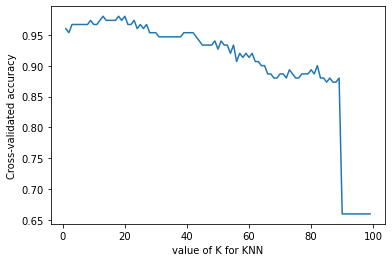

In [97]:
k_range = list(range(1,100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())
    
plt.plot (k_range, k_scores)
plt.xlabel("value of K for KNN")
plt.ylabel("Cross-validated accuracy");

In [101]:
for index, value in enumerate(k_scores):
    k_param = index+1
    print(k_param, round(value,2))

1 0.96
2 0.95
3 0.97
4 0.97
5 0.97
6 0.97
7 0.97
8 0.97
9 0.97
10 0.97
11 0.97
12 0.97
13 0.98
14 0.97
15 0.97
16 0.97
17 0.97
18 0.98
19 0.97
20 0.98
21 0.97
22 0.97
23 0.97
24 0.96
25 0.97
26 0.96
27 0.97
28 0.95
29 0.95
30 0.95
31 0.95
32 0.95
33 0.95
34 0.95
35 0.95
36 0.95
37 0.95
38 0.95
39 0.95
40 0.95
41 0.95
42 0.95
43 0.95
44 0.94
45 0.93
46 0.93
47 0.93
48 0.93
49 0.94
50 0.93
51 0.94
52 0.93
53 0.93
54 0.92
55 0.93
56 0.91
57 0.92
58 0.91
59 0.92
60 0.91
61 0.92
62 0.91
63 0.91
64 0.9
65 0.9
66 0.89
67 0.89
68 0.88
69 0.88
70 0.89
71 0.89
72 0.88
73 0.89
74 0.89
75 0.88
76 0.88
77 0.89
78 0.89
79 0.89
80 0.89
81 0.89
82 0.9
83 0.88
84 0.88
85 0.87
86 0.88
87 0.87
88 0.87
89 0.88
90 0.66
91 0.66
92 0.66
93 0.66
94 0.66
95 0.66
96 0.66
97 0.66
98 0.66
99 0.66


In [106]:
for index, value in enumerate(k_scores):
    k_param = index+1
    max_value= max(k_scores)
print("Best K Parameter: ", 1+k_scores.index(max_value))

Best K Parameter:  13


# how to find best K parameter GridSearchCV

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
k_range = list(range(1,100))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [110]:
param_grid= dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [111]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")

In [112]:
grid.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=99),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [113]:
grid.cv_results_

{'mean_fit_time': array([1.07054710e-03, 9.07874107e-04, 8.41188431e-04, 7.87758827e-04,
        4.05859947e-04, 4.50658798e-04, 6.89816475e-04, 4.72736359e-04,
        1.79433823e-04, 7.34305382e-04, 7.41291046e-04, 6.12616539e-04,
        4.17304039e-04, 2.99263000e-04, 2.75683403e-04, 6.40583038e-04,
        6.00433350e-04, 5.63263893e-04, 4.84323502e-04, 4.24051285e-04,
        7.28821754e-04, 4.65083122e-04, 5.11264801e-04, 4.73618507e-04,
        6.34121895e-04, 7.23552704e-04, 1.54972076e-04, 5.16867638e-04,
        4.05478477e-04, 4.23574448e-04, 5.66673279e-04, 4.33635712e-04,
        6.03175163e-04, 9.73415375e-04, 7.54451752e-04, 5.72562218e-04,
        8.43906403e-04, 1.42192841e-04, 4.86087799e-04, 3.97419930e-04,
        4.55760956e-04, 3.56054306e-04, 4.24242020e-04, 5.28335571e-04,
        5.11860847e-04, 9.96828079e-05, 5.29646873e-04, 5.03039360e-04,
        7.49945641e-04, 8.12339783e-04, 2.68793106e-04, 4.44293022e-04,
        3.96633148e-04, 5.50866127e-04, 4.06646

In [115]:
def examine_results(model_grid):
    print("rank_test_score", model_grid.cv_results_["rank_test_score"])
    print("mean_test_score", model_grid.cv_results_["mean_test_score"])
examine_results(grid)

rank_test_score [24 27 18 18 12 12 12 12  4 12 12  4  1  4  4  4  4  1  4  1 18 18  4 24
 18 24 18 27 27 27 35 35 35 35 35 35 35 35 27 27 27 27 35 44 47 47 47 47
 44 54 44 47 47 55 47 61 55 59 55 60 58 61 61 65 65 69 69 78 78 69 69 78
 67 69 78 78 69 69 69 67 69 64 78 78 87 78 87 87 78 90 90 90 90 90 90 90
 90 90 90]
mean_test_score [0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333
 0.94666667 0.94666667 0.94666667 0.94666667 0.94666667 0.94666667
 0.94666667 0.94666667 0.95333333 0.95333333 0.95333333 0.95333333
 0.94666667 0.94       0.93333333 0.93333333 0.93333333 0.93333333
 0.94       0.92666667 0.94       0.93333333 0.93333333 0.92
 0.93333333 0.90666667 0.92       0.91333333 0.92       0.91333333
 0.92       0

In [116]:
print("best scores:", grid.best_score_, "best parameters", grid.best_params_)

best scores: 0.9800000000000001 best parameters {'n_neighbors': 13}


In [122]:
k_range =list(range(1,31))
weight_options= ["uniform", "distance"]
metric_options= ["euclidean", "manhattan", "minkowski"]

In [123]:
param_grid= dict(n_neighbors=k_range, weights=weight_options, metric=metric_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [124]:
grid= GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
grid.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=99),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [125]:
grid.cv_results_

{'mean_fit_time': array([0.00069199, 0.00058539, 0.00061965, 0.00037041, 0.00048883,
        0.00030804, 0.00028329, 0.00030327, 0.00049872, 0.00061073,
        0.00052364, 0.00038779, 0.00062332, 0.00034008, 0.00056758,
        0.00040011, 0.00056806, 0.00048761, 0.00035818, 0.00060394,
        0.00040512, 0.00060074, 0.00085518, 0.00056567, 0.00042617,
        0.00057437, 0.00067611, 0.00080097, 0.00079467, 0.00053561,
        0.00082054, 0.00059133, 0.00038285, 0.0004077 , 0.00036607,
        0.00042286, 0.0004565 , 0.00088794, 0.00043788, 0.00069237,
        0.00059114, 0.00064478, 0.00067785, 0.00054605, 0.00044744,
        0.00050933, 0.00060761, 0.0004914 , 0.00054667, 0.00052302,
        0.00060804, 0.00079148, 0.00029919, 0.00039899, 0.0004494 ,
        0.00048308, 0.00032065, 0.00039923, 0.00018346, 0.00054486,
        0.00048237, 0.00049176, 0.00054295, 0.0004133 , 0.00049269,
        0.00049877, 0.00040803, 0.00040767, 0.0004231 , 0.00048912,
        0.0004039 , 0.0005091 ,

In [126]:
examine_results(grid)

rank_test_score [142 142 164 142 116 116 116 116  75  75  75  75  75  75  75  75  15  15
  75  15  75  15  15  15   1  15  15  15  15   1  15  15  15   1   1  15
  15   1   1  75 116  75 116  75  15  15 142  15 116  15 142  75 116   1
 164  15 164  15 164 116 142 142 179 142 142 142 164 142  75  75 179 164
 164  75 164 164  15  75 142 142 141  75  75  75  75  75  75  15  15  75
  15  15  15  75  15  15  15  75  15  15 116  15 142  15  15  15 116  15
  15  15 142 116 142 116 164 116 164 116 142 116 142 142 164 142 116 116
 116 116  75  75  75  75  75  75  75  75  15  15  75  15  75  15  15  15
   1  15  15  15  15   1  15  15  15   1   1  15  15   1   1  75 116  75
 116  75  15  15 142  15 116  15 142  75 116   1 164  15 164  15 164 116]
mean_test_score [0.96       0.96       0.95333333 0.96       0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.97333333 0.97333333
 0.96666667 0.97333333 0.96666667 0.

In [127]:
print("best scores:", grid.best_score_, "best parameters", grid.best_params_)

best scores: 0.9800000000000001 best parameters {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}


# alternative # how to find best K parameter GridSearchCV 

In [128]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
param_grid= dict(n_neighbors=k_range, weights=weight_options, metric=metric_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [130]:
rand = RandomizedSearchCV(knn, param_grid, cv=10, scoring="accuracy")
rand.fit(x,y)
rand.cv_results_

{'mean_fit_time': array([0.00123475, 0.0006681 , 0.00039871, 0.00068972, 0.0007823 ,
        0.0004766 , 0.00091078, 0.00102632, 0.0004982 , 0.00059071]),
 'std_fit_time': array([5.91306527e-04, 4.64718676e-04, 4.88315103e-04, 4.52220486e-04,
        3.92706172e-04, 4.77641655e-04, 3.71543507e-04, 6.08619686e-05,
        4.99054546e-04, 4.82618984e-04]),
 'mean_score_time': array([0.00230513, 0.00107267, 0.0007962 , 0.00144677, 0.0011153 ,
        0.00126584, 0.0012435 , 0.00117631, 0.00070074, 0.00069861]),
 'std_score_time': array([0.00137511, 0.00050539, 0.00059364, 0.00047921, 0.00053583,
        0.00038965, 0.00038779, 0.00036995, 0.00045891, 0.00045931]),
 'param_weights': masked_array(data=['uniform', 'distance', 'distance', 'uniform',
                    'distance', 'uniform', 'uniform', 'uniform',
                    'distance', 'uniform'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
   

In [131]:
examine_results(rand)

rank_test_score [9 9 1 4 1 1 8 4 4 7]
mean_test_score [0.95333333 0.95333333 0.98       0.97333333 0.98       0.98
 0.96       0.97333333 0.97333333 0.96666667]


In [132]:
print("best scores:", rand.best_score_, "best parameters", rand.best_params_)

best scores: 0.9800000000000001 best parameters {'weights': 'distance', 'n_neighbors': 17, 'metric': 'euclidean'}
